# Insper - Modelagem e Simulação do Mundo Físico

## Simulção de um copo de água esfriando/aquecendo no ambiente

## Bibliotecas

In [1]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

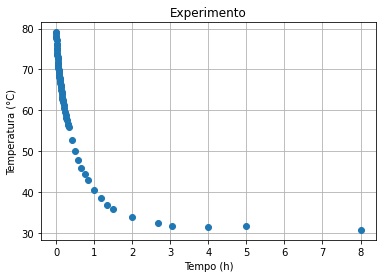

In [2]:
lista_t_exp = [5/3600 ,10/3600 ,20/3600 ,30/3600 ,40/3600 ,50/3600 ,60/3600,75/3600,90/3600,105/3600,120/3600,135/3600,150/3600,165/3600,180/3600,195/3600,210/3600,225/3600,240/3600,255/3600,270/3600,285/3600,300/3600,315/3600,330/3600,345/3600,360/3600,390/3600,420/3600,450/3600,480/3600,510/3600,540/3600,570/3600,600/3600,630/3600,660/3600,720/3600,780/3600,840/3600,900/3600,960/3600,1020/3600,1080/3600,1140/3600,1200/3600,1500/3600,1800/3600,2100/3600,2400/3600,2700/3600,3000/3600,3600/3600,4200/3600,4800/3600,5400/3600,7200/3600,9600/3600,10920/3600,4,5,8]

lista_Ta_exp = [79.1,78.8,78.3,77.6,77.1,76.3,75.9,75.3,74.7,74.0,73.5,73.0,72.5,71.9,71.4,71.1,70.8,70.3,69.9,69.5,69.4,68.9,68.5,68.1,67.8,67.5,67.1,66.6,66.1,65.6,65.0,64.5,63.9,63.3,62.8,62.5,62.0,61.2,60.5,59.6,58.8,58.1,57.5,56.7,56.4,55.8,52.8,50.1,47.8,45.8,44.4,42.8,40.5,38.5,36.9,35.7,33.8,32.3,31.7,31.5,31.6,30.7]


plt.plot(lista_t_exp, lista_Ta_exp, 'o')
plt.title('Experimento')
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()
# experimento.savefig('1°.Validação.png',  format = 'png', dpi = 1200)

In [3]:
# Declara os parâmetros do modelo

# Dimensões (m)
r = 0.031                # Recipiente (raio interno)
hr = 0.1                 # Recipiente (altura)
dr = 0.002/2             # Recipiente (espessura)  (1/2)

# Áreas (m2)
As = pi*r**2             # Óleo (superfície)
Ap = 2*pi*r*hr           # Recipiente (paredes externas)
Ar = Ap                  # Recipiente (paredes internas)

# Volumes (m3)
va = As*hr               # Óleo
vr = As*(2*dr)+Ap*(2*dr) # Recipiente

# Densidades (kg/m3)
rhoa = 997               # Óleo
rhor = 2500              # Recipiente (aço)

# Massas (kg)
ma = rhoa*va             # Óleo
mr = rhor*vr             # Recipiente

# Calores específicos (J/(kg.K))
ca = 4180                # Óleo
cr = 812                 # Recipiente (vidro)

# Coeficientes de condutividade térmica (W/(m.K))
kr = 1.05                  # Recipiente (aço)

# Coeficiente de transferência convectiva (W/(m2.K))
hs = 25                  # Oleo para o ar
hp = 25                  # Recipiente para o ar

#Temperaturas (K)
Tar = 30+273.15           # Ambiente
Ta = 80+273.15
Tr = 80+273.15

# Emissividade 
emissividade = 0.92      # Água

# Constante de Stefan-Boltzman (W/(m2.K4))
sigma = 5.6703e-8

In [4]:
def modelo (x, t):

    Ta = x[0]
    Tr = x[1]

    Qs = (Ta-Tar)/(1/(hs*As))
    Qr = (Ta-Tr)/(dr/(kr*Ar))
    Qp = (Tr-Tar)/((dr/(kr*Ar))+(1/(hp*Ap)))

    dTadt = (-Qs-Qr)/(ma*ca)
    dTrdt = (Qr-Qp)/(mr*cr)
    dxdt = [dTadt, dTrdt]
    
    return dxdt

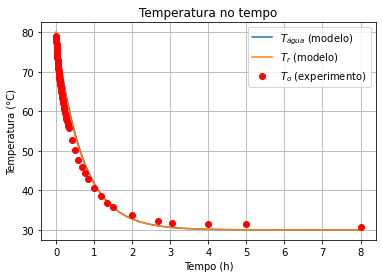

In [5]:
# Lista tempo
dt = 1
t_lista = np.arange(0, 28800, dt)

# Condições iniciais
x0 = [Ta, Tr]

# Resolução numérica
x = odeint(modelo, x0, t_lista)
To_lista = x[:,0]-273.15
Tr_lista = x[:,1]-273.15

# Plota gráficos
validação, ax = plt.subplots()

plt.plot(t_lista/3600, To_lista, label = '$T_{água}$ (modelo)')
plt.plot(t_lista/3600, Tr_lista, label = '$T_r$ (modelo)')
plt.plot(lista_t_exp, lista_Ta_exp, 'ro', label = '$T_o$ (experimento)')
plt.title('Temperatura no tempo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show()

validação.savefig('1°.Validação.png',  format = 'png', dpi = 1200)

In [6]:
def modelo2 (x, t):

    Ta = x[0]
    Tr = x[1]

    Qs = (Ta-Tar)/(1/(hs*As))
    Qr = (Ta-Tr)/(dr/(kr*Ar))
    Qp = (Tr-Tar)/((dr/(kr*Ar))+(1/(hp*Ap)))
    Qrad = As*emissividade*sigma*Ta**4

    dTadt = (-Qs-Qr-Qrad)/(ma*ca)
    dTrdt = (Qr-Qp)/(mr*cr)
    dxdt = [dTadt, dTrdt]
    
    return dxdt

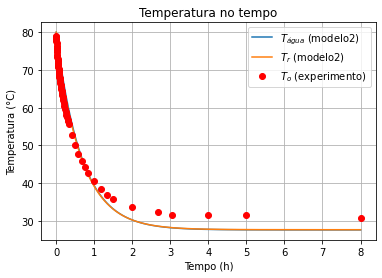

In [7]:
x = odeint(modelo2, x0, t_lista)
To_lista = x[:,0]-273.15
Tr_lista = x[:,1]-273.15

# Plota gráficos
validação, ax = plt.subplots()

plt.plot(t_lista/3600, To_lista, label = '$T_{água}$ (modelo2)')
plt.plot(t_lista/3600, Tr_lista, label = '$T_r$ (modelo2)')
plt.plot(lista_t_exp, lista_Ta_exp, 'ro', label = '$T_o$ (experimento)')
plt.title('Temperatura no tempo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show()

validação.savefig('1°.Validação2.png',  format = 'png', dpi = 1200)